
<font color='red' size='6'> Outlier detection and removal using Z Score</font>

In [2]:
import pandas as pd
df = pd.read_excel('DS3.xls', engine='xlrd')
df.head(5)

*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


,X,Y
0,6.2,29
1,9.5,44
2,10.5,36
3,7.7,37
4,8.6,53


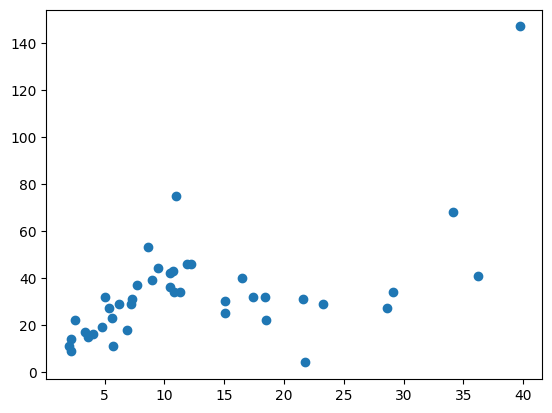

In [30]:
plt.scatter(df.X,df.Y)

In [3]:
df.Y.skew()

3.097576595878416

In [4]:
df.X.skew()

1.2532308271884283

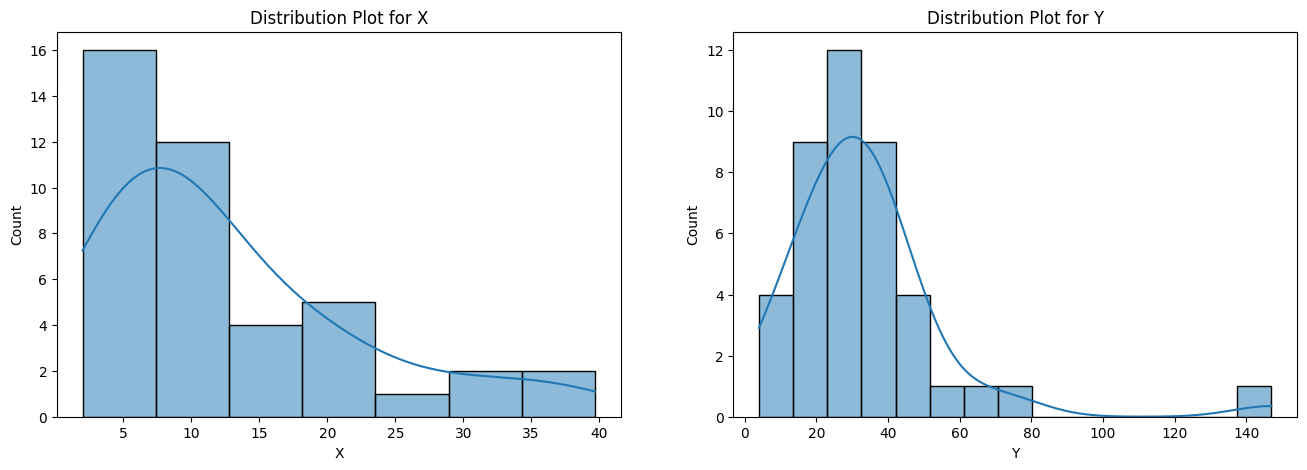

In [7]:

import warnings

# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(16, 5))

# Create the first subplot
plt.subplot(1, 2, 1)
sns.histplot(df['X'], kde=True)
plt.title('Distribution Plot for X')

# Create the second subplot
plt.subplot(1, 2, 2)
sns.histplot(df['Y'], kde=True)
plt.title('Distribution Plot for Y')

plt.show()



In [8]:
df['zscore'] = ( df.Y - df.Y.mean() ) / df.Y.std()
df

,X,Y,zscore
0,6.2,29,-0.202542
1,9.5,44,0.448487
2,10.5,36,0.101271
3,7.7,37,0.144673
4,8.6,53,0.839104
5,34.1,68,1.490134
6,11.0,75,1.793947
7,6.9,18,-0.679964
8,7.3,31,-0.115739
9,15.1,25,-0.376150


In [9]:
df.Y.std()

23.040438116882374

In [10]:
df.Y.mean()

33.666666666666664

In [11]:
(29-33.666666666666664)/23.040438116882374

-0.20254244485252504

**Get data points that has z score higher than 3 or lower than -3. Another way of saying same thing is get data points that are more than 3 standard deviation away**

In [68]:
df[df['zscore']>2]


,X,Y,zscore
23,39.7,147,4.918888


In [69]:
df[df['zscore']<-2]

,X,Y,zscore



<font color='red' size='6'>Here is the list of all outliers</font>

In [14]:
df[(df.zscore<-2) | (df.zscore>2)]

,X,Y,zscore
23,39.7,147,4.918888



<font color='red' size='6'>Remove the outliers and produce new dataframe</font>

In [70]:
df_no_outliers = df[(df.zscore>-3) & (df.zscore<3)]
df_no_outliers.head(5)

,X,Y,zscore
0,6.2,29,-0.202542
1,9.5,44,0.448487
2,10.5,36,0.101271
3,7.7,37,0.144673
4,8.6,53,0.839104


In [71]:
df_no_outliers.shape

(41, 3)

In [17]:
df.shape

(42, 3)

**Y**

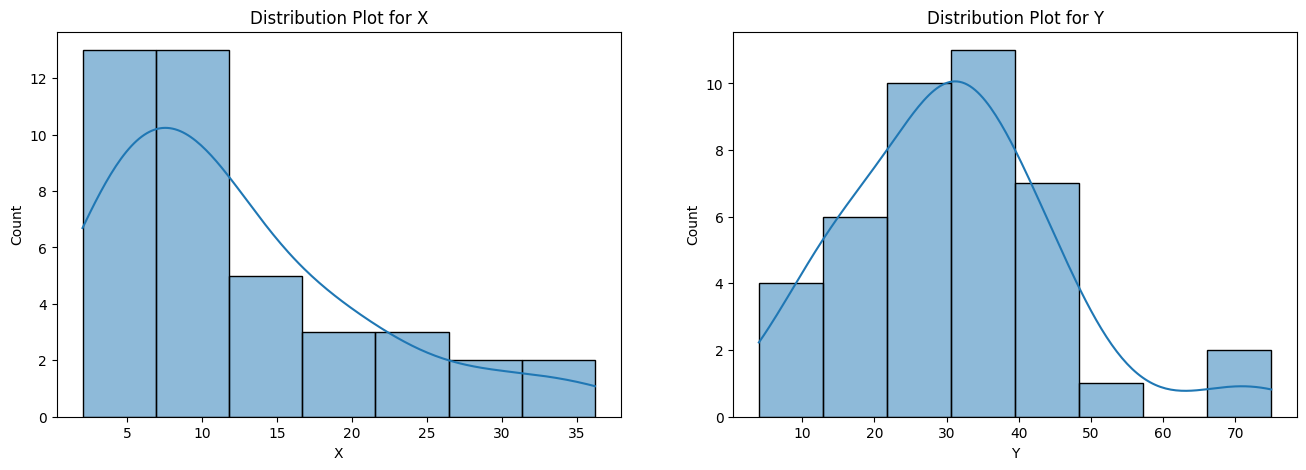

In [72]:
import warnings

# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(16, 5))

# Create the first subplot
plt.subplot(1, 2, 1)
sns.histplot(df_no_outliers['X'], kde=True)
plt.title('Distribution Plot for X')

# Create the second subplot
plt.subplot(1, 2, 2)
sns.histplot(df_no_outliers['Y'], kde=True)
plt.title('Distribution Plot for Y')

plt.show()


In [77]:
# collecting x & y
import numpy as np
X = df_no_outliers['X'].values
Y = df_no_outliers['Y'].values

# calculate mean of x & y using an inbuilt numpy method mean()
mean_x = np.mean(X)
mean_y = np.mean(Y)
mean_x,mean_y

(12.034146341463416, 30.902439024390244)

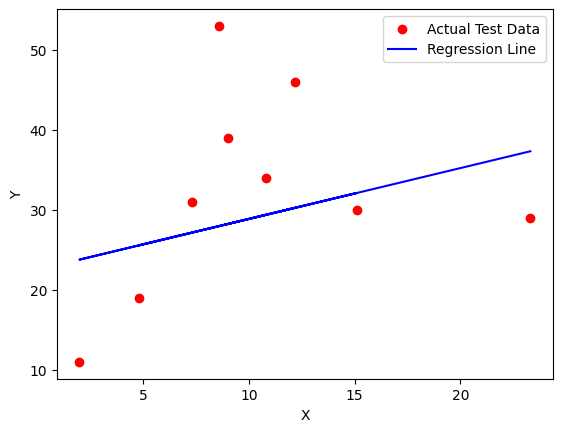

Regression Equation: Y = 0.64X + 22.51
Mean Squared Error (MSE) on Test Set: 145.07
R-squared on Test Set: 0.00


In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have loaded your data into X and Y

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Calculate the means of X_train and Y_train
mean_x_train = np.mean(X_train)
mean_y_train = np.mean(Y_train)

# Calculate the slope (m) and intercept (c) using the least squares method on the training set
numer = 0
denom = 0
for i in range(len(X_train)):
    numer += (X_train[i] - mean_x_train) * (Y_train[i] - mean_y_train)
    denom += (X_train[i] - mean_x_train) ** 2

m = numer / denom
c = mean_y_train - (m * mean_x_train)

# Create a regression line using the calculated m and c
regression_line = [(m * x) + c for x in X_test]

# Calculate the mean squared error (MSE) on the test set
mse = mean_squared_error(Y_test, regression_line)

# Calculate the coefficient of determination (R-squared) on the test set
r_squared = r2_score(Y_test, regression_line)

# Plot the data points and regression line (only for visualization, optional)
plt.scatter(X_test, Y_test, c="red", label="Actual Test Data")
plt.plot(X_test, regression_line, label="Regression Line", color="blue")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

# Display the regression equation, MSE, and R-squared value
print(f"Regression Equation: Y = {m:.2f}X + {c:.2f}")
print(f"Mean Squared Error (MSE) on Test Set: {mse:.2f}")
print(f"R-squared on Test Set: {r_squared:.2f}")
